# Summary
This analysis explores behavioral differences between extroverted and introverted individuals using the "[Extrovert vs Introvert Behavior Data](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data)" dataset from Kaggle. We will follow the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act, to identify patterns, compare traits, and draw meaningful conclusions about both personality types.
# Ask Phase
The Ask phase sets the direction of the analysis. It defines the objectives and key questions we want to answer, ensuring the work with the data is clear, focused, and useful. Since the dataset focuses on the behavior of extroverted and introverted individuals, the analysis will aim to understand which variables are most associated with each personality type and how they relate to each other.

Key questions for the analysis:
1. What factors determine whether a person is introverted or extroverted?
2. What relationships exist between other variables in the dataset?
# Prepare Phase
## About the data
The dataset used for this analysis is publicly available on Kaggle. It contains a total of 2,900 rows and 8 columns, with data collected from behavioral responses related to extroverted and introverted personality traits. The variables include questions about social habits, preferences, activities, and emotional responses.

Before starting the analysis, the quality and relevance of the dataset will be evaluated using the ROCCC criteria (Reliable, Original, Comprehensive, Current, Cited), which help ensure the data is trustworthy, original, complete, up-to-date, and properly cited.
* Reliable: Dataset published on Kaggle by user rakeshkapilavai, a recognized platform for data science projects.
* Original: The dataset appears to be created by the author, with no external source explicitly mentioned.
* Comprehensive: Contains 8 columns and 2,900 rows, covering a range of behavioral variables relevant to personality analysis.
* Current: The dataset was last updated on May 21, 2025.
* Cited: There are no references or citations included with the dataset.

While this project may not fully satisfy all the ROCCC criteria, it provides a valuable and interesting dataset for exploratory data analysis. It enables the practice and application of techniques to better understand behavioral differences between extroverted and introverted individuals.
## Data
The dataset contains 2,900 rows and 8 columns. Below is a summary of the key variables used in the analysis.

| Column Name                | Description                               |
|----------------------------|-------------------------------------------|
| **Time_spent_Alone**        | Hours spent alone daily (0–11).           |
| **Stage_fear**              | Presence of stage fright (Yes/No).        |
| **Social_event_attendance** | Frequency of social events (0–10).        |
| **Going_outside**           | Frequency of going outside (0–7).         |
| **Drained_after_socializing** | Feeling drained after socializing (Yes/No). |
| **Friends_circle_size**     | Number of close friends (0–15).            |
| **Post_frequency**          | Social media post frequency (0–10).       |
| **Personality**             | Target variable (Extrovert/Introvert).    |

All columns will be used in this analysis as they provide relevant information to understand behavioral differences between extroverted and introverted individuals.
# Process Phase
In this processing phase, data cleaning and preparation will be performed to ensure data quality and consistency. This includes identifying and handling missing values, correcting errors, standardizing formats, and validating data types for each column. Additionally, any transformations applied to the variables—such as outlier detection, duplicate removal, or encoding categorical variables—will be documented to ensure the dataset is ready for further analysis.
## Data Inspection
The initial inspection of the data will be conducted using code that helps identify data types, detect null or missing values, and provide an overview of the dataset’s structure and content.

In [1]:
# Librariens & Datasets

import pandas as pd
df = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv")

# First few rows

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [2]:
# Structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Note that several columns contain null values, which will need to be addressed during preprocessing. The data types, however, appear to be appropriate for the variables.

In [3]:
# Unique values

df.nunique()

Time_spent_Alone             12
Stage_fear                    2
Social_event_attendance      11
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          16
Post_frequency               11
Personality                   2
dtype: int64

In this context, the presence of duplicate values is acceptable.

In [4]:
# statics

df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


It can be verified that the values in all columns align with the ranges and categories specified in the dataset documentation.
## Data cleaning process
The following section outlines the process for cleaning the dataset to ensure it is ready for analysis.

In [5]:
# Show null values

print(df.isnull().sum(axis=1).value_counts().sort_index())

0    2477
1     391
2      29
3       3
Name: count, dtype: int64


I will remove the rows that contain more than one null value, as deleting all rows with any null values would result in excessive data loss. With this approach, approximately 1.14% of the total data will be lost, that is, 33 out of 2,900 rows.

In [6]:
# Remove null values

df = df[df.isnull().sum(axis = 1) < 2]
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2815 non-null   float64
 1   Stage_fear                 2807 non-null   object 
 2   Social_event_attendance    2815 non-null   float64
 3   Going_outside              2814 non-null   float64
 4   Drained_after_socializing  2822 non-null   object 
 5   Friends_circle_size        2801 non-null   float64
 6   Post_frequency             2811 non-null   float64
 7   Personality                2868 non-null   object 
dtypes: float64(5), object(3)
memory usage: 179.4+ KB


## Conclusions from data cleaning
After completing the data cleaning steps, the following key changes and observations were made:
* Overall, the data is quite complete and well-structured.
* Only rows with more than one null value were removed to avoid significant data loss.
* After cleaning, the final dataset contains 2,868 entries ready for analysis.
# Analyze
In this section, key statistics and patterns within the dataset are explored to gain meaningful insights. The goal is to understand behavioral trends and differences between introverts and extroverts through summary metrics.

In [7]:
# Extrovert & introvert

print("Extroverts and Introverts")
print(df['Personality'].value_counts())

# Stage fair

print("\nStage fear")
print(df[df['Stage_fear'] == 'Yes'].groupby('Personality').size())

# Social event attendance

print("\nSocial event attendance")
print(df.groupby('Personality')['Social_event_attendance'].mean())

# Going outside 

print("\nGoing outside")
print(df.groupby('Personality')['Going_outside'].mean())

# Drained after socializing

print("\nDrained after socializing")
print(df[df['Drained_after_socializing'] == 'Yes'].groupby('Personality').size())

# Friends circle size

print("\nFriends circle size")
print(df.groupby('Personality')['Friends_circle_size'].mean())

# Post_frequency

print("\nPost frequency")
print(df.groupby('Personality')['Post_frequency'].mean())

Extroverts and Introverts
Personality
Extrovert    1478
Introvert    1390
Name: count, dtype: int64

Stage fear
Personality
Extrovert     111
Introvert    1287
dtype: int64

Social event attendance
Personality
Extrovert    6.017218
Introvert    1.782098
Name: Social_event_attendance, dtype: float64

Going outside
Personality
Extrovert    4.63216
Introvert    1.27619
Name: Going_outside, dtype: float64

Drained after socializing
Personality
Extrovert     111
Introvert    1282
dtype: int64

Friends circle size
Personality
Extrovert    9.155448
Introvert    3.196324
Name: Friends_circle_size, dtype: float64

Post frequency
Personality
Extrovert    5.629144
Introvert    1.372707
Name: Post_frequency, dtype: float64


We are going to perform a correlation analysis. For this, it will be necessary to convert the boolean variables into numerical values, which will allow them to be included in the correlation matrix calculation.

In [8]:
# Transform columns

pd.set_option('future.no_silent_downcasting', True)
df_corr = df.replace({'Yes': 1, 'No': 0, 'Extrovert': 1, 'Introvert': 0}).infer_objects(copy=False)

# Correlation

print(df_corr.corr(numeric_only = True))

                           Time_spent_Alone  Stage_fear  \
Time_spent_Alone                   1.000000    0.859986   
Stage_fear                         0.859986    1.000000   
Social_event_attendance           -0.733740   -0.859872   
Going_outside                     -0.751218   -0.882010   
Drained_after_socializing          0.860383    1.000000   
Friends_circle_size               -0.717222   -0.835194   
Post_frequency                    -0.732775   -0.854157   
Personality                       -0.719929   -0.864835   

                           Social_event_attendance  Going_outside  \
Time_spent_Alone                         -0.733740      -0.751218   
Stage_fear                               -0.859872      -0.882010   
Social_event_attendance                   1.000000       0.747572   
Going_outside                             0.747572       1.000000   
Drained_after_socializing                -0.859740      -0.881980   
Friends_circle_size                       0.734872    

## Conclusions of the analysis
After conducting a thorough data analysis, some key conclusions can be drawn that summarize the observed behaviors and relationships among variables related to introverted and extroverted personalities.
* Introverted and extroverted personalities behave as expected; for example, extroverted individuals tend to have a larger number of close friends.
* There is a strong positive or negative correlation among most of the variables analyzed, indicating consistent relationships between different aspects of social behavior.
* The lowest correlation found was 0.69, corresponding to the relationship between the size of the close friends circle and personality, which still represents a significant association.
# Share
In this section, we will create visualizations to clearly present the main insights uncovered in the personality behavior dataset. These visual tools will help make the patterns and relationships more understandable and accessible to stakeholders.

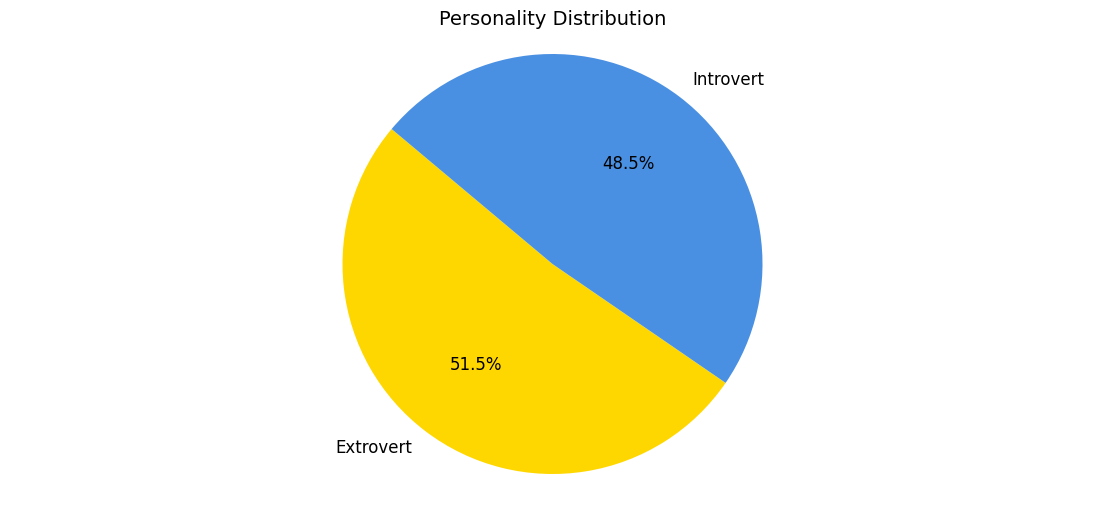

In [9]:
# Import libraries

import seaborn as sns
import matplotlib.pyplot as plt

# Colors

colors = {
    'Introvert': '#4A90E2',
    'Extrovert': '#FFD700'
}

# Introverts and Extroverts

plt.figure(figsize = (14, 6))
plt.pie(
    df['Personality'].value_counts(),
    labels = df['Personality'].value_counts().index,
    colors=[colors.get(p, '#cccccc') for p in df['Personality'].value_counts().index],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Personality Distribution", fontsize=14)
plt.axis('equal')
plt.show()

/tmp/ipykernel_13/1575652479.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/1575652479.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/1575652479.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/1575652479.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/1575652479.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/1575652479.py:80: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


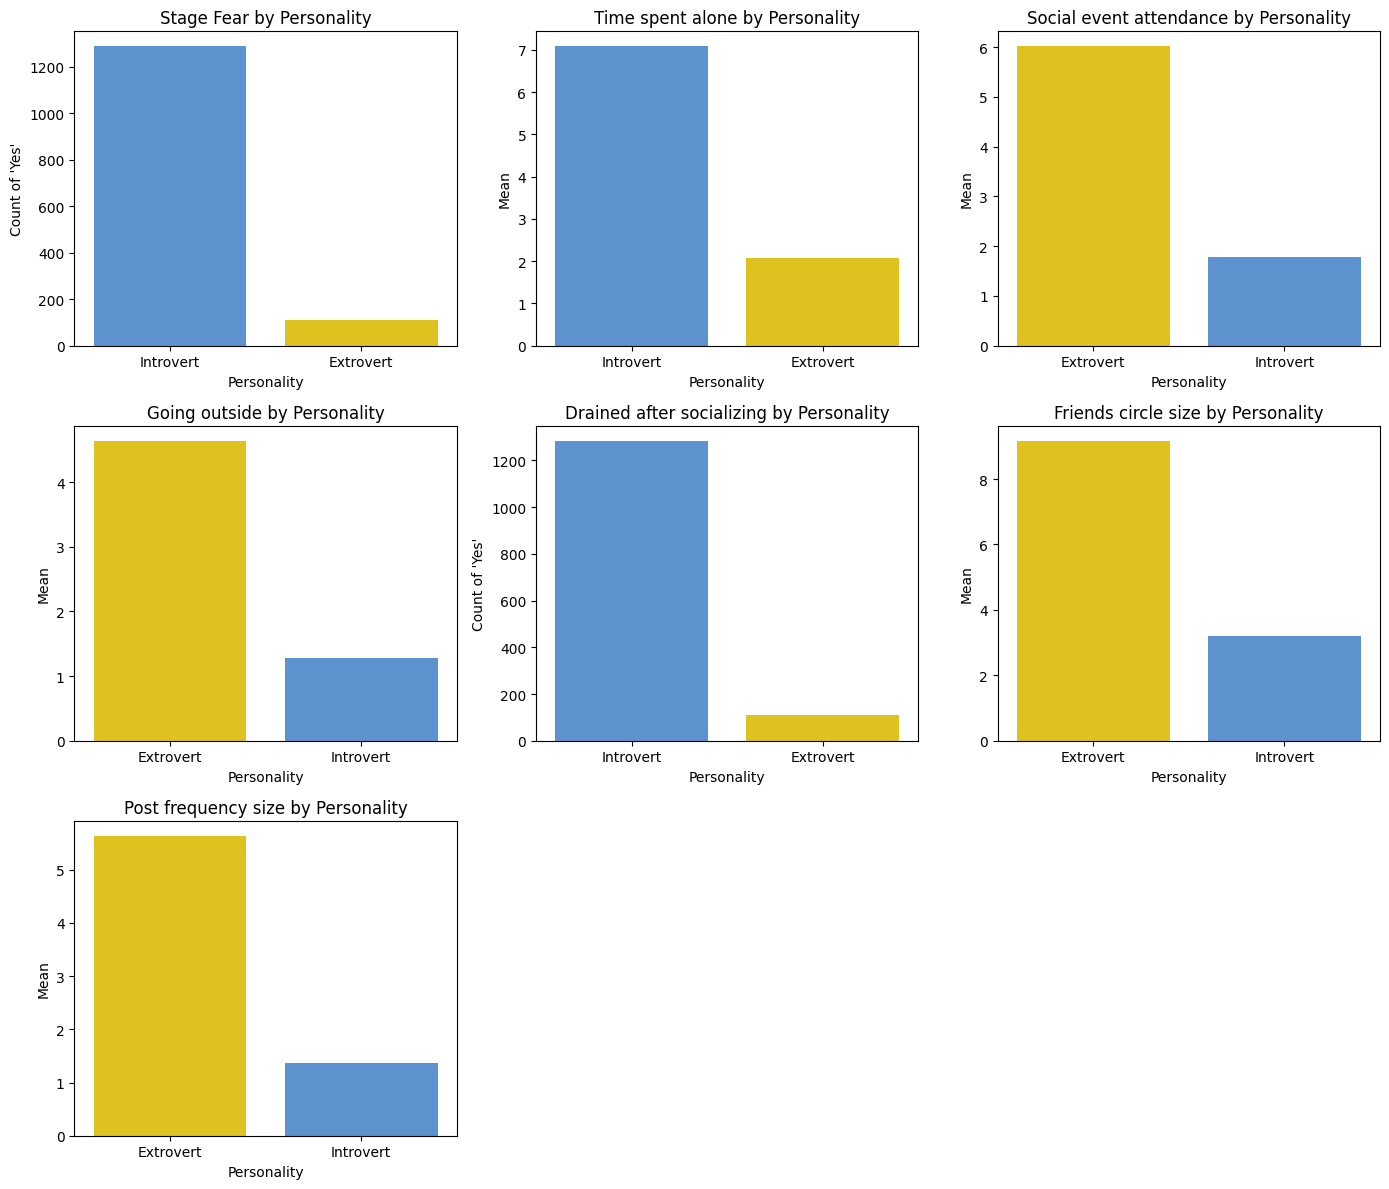

In [10]:
# Personality and other variables

plt.figure(figsize=(14, 12))

plt.subplot(3, 3, 1)
sns.barplot(
    x=df.groupby('Personality')['Stage_fear'].sum().sort_values(ascending=False).index,
    y = df.groupby('Personality')['Stage_fear'].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False).values,
    palette = colors
)
plt.title("Stage Fear by Personality")
plt.ylabel("Count of 'Yes'")
plt.xlabel("Personality")
plt.tight_layout()

plt.subplot(3, 3, 2)
sns.barplot(
    x=df.groupby('Personality')['Time_spent_Alone'].mean().sort_values(ascending=False).index,
    y=df.groupby('Personality')['Time_spent_Alone'].mean().sort_values(ascending=False).values,
    palette = colors
)
plt.title("Time spent alone by Personality")
plt.ylabel("Mean")
plt.xlabel("Personality")
plt.tight_layout()

plt.subplot(3, 3, 3)
sns.barplot(
    x=df.groupby('Personality')['Social_event_attendance'].mean().sort_values(ascending=False).index,
    y=df.groupby('Personality')['Social_event_attendance'].mean().sort_values(ascending=False).values,
    palette = colors
)
plt.title("Social event attendance by Personality")
plt.ylabel("Mean")
plt.xlabel("Personality")
plt.tight_layout()

plt.subplot(3, 3, 4)
sns.barplot(
    x=df.groupby('Personality')['Going_outside'].mean().sort_values(ascending=False).index,
    y=df.groupby('Personality')['Going_outside'].mean().sort_values(ascending=False).values,
    palette = colors
)
plt.title("Going outside by Personality")
plt.ylabel("Mean")
plt.xlabel("Personality")
plt.tight_layout()

plt.subplot(3, 3, 5)
sns.barplot(
    x=df.groupby('Personality')['Drained_after_socializing'].sum().sort_values(ascending=False).index,
    y = df.groupby('Personality')['Drained_after_socializing'].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False).values,
    palette = colors
)
plt.title("Drained after socializing by Personality")
plt.ylabel("Count of 'Yes'")
plt.xlabel("Personality")
plt.tight_layout()

plt.subplot(3, 3, 6)
sns.barplot(
    x=df.groupby('Personality')['Friends_circle_size'].mean().sort_values(ascending=False).index,
    y=df.groupby('Personality')['Friends_circle_size'].mean().sort_values(ascending=False).values,
    palette = colors
)
plt.title("Friends circle size by Personality")
plt.ylabel("Mean")
plt.xlabel("Personality")
plt.tight_layout()

plt.subplot(3, 3, 7)
sns.barplot(
    x=df.groupby('Personality')['Post_frequency'].mean().sort_values(ascending=False).index,
    y=df.groupby('Personality')['Post_frequency'].mean().sort_values(ascending=False).values,
    palette = colors
)
plt.title("Post frequency size by Personality")
plt.ylabel("Mean")
plt.xlabel("Personality")
plt.tight_layout()
plt.show()

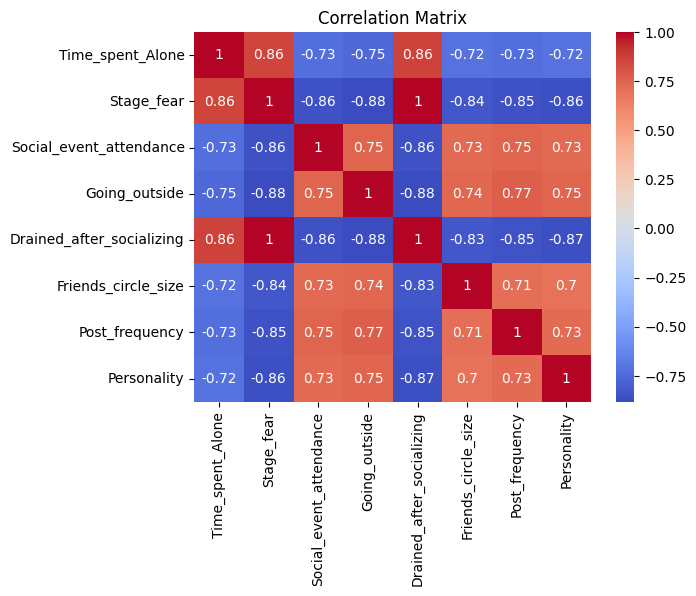

In [11]:
# Correlation matrix

sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Act
This stage presents strategic conclusions derived from the analysis of personality traits and associated behaviors in the dataset.
* Extroverts behave as expected: they have larger circles of close friends, attend social events more frequently, go outside more often, and post more actively on social media.
* Introverts, on the other hand, tend to spend more time alone, report higher levels of stage fear, and often feel drained after socializing.
* All variables show significant correlations. For example, individuals with stage fear tend to have smaller friend circles, suggesting a link between social anxiety and lower social engagement.
* Similarly, those who attend social events more frequently tend to have larger friend networks and report lower levels of stage fear.

These patterns highlight the behavioral differences between introverts and extroverts and suggest that social engagement, emotional responses, and personality are closely interconnected. These insights can help design social support programs or community events that better meet the needs of each personality type.